In [1]:
# Importing important libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Reading the CSV file with Pandas
# Dataset link = https://catalog.data.gov/dataset/patient-characteristics-survey-pcs-2017

df = pd.read_csv("../data/Patient_Characteristics_Survey__PCS___2017.csv", skipinitialspace=True)
print(df.head())

   Survey Year Program Category         Region Served Age Group     Sex  \
0         2017       OUTPATIENT     CENTRAL NY REGION     ADULT  FEMALE   
1         2017          SUPPORT        WESTERN REGION     ADULT  FEMALE   
2         2017       OUTPATIENT     CENTRAL NY REGION     ADULT  FEMALE   
3         2017       OUTPATIENT  NEW YORK CITY REGION     ADULT  FEMALE   
4         2017       OUTPATIENT     CENTRAL NY REGION     ADULT    MALE   

           Transgender        Sexual Orientation       Hispanic Ethnicity  \
0  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL  NO, NOT HISPANIC/LATINO   
1  NO, NOT TRANSGENDER                   UNKNOWN  NO, NOT HISPANIC/LATINO   
2  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL  NO, NOT HISPANIC/LATINO   
3  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL  NO, NOT HISPANIC/LATINO   
4  NO, NOT TRANSGENDER  STRAIGHT OR HETEROSEXUAL  NO, NOT HISPANIC/LATINO   

         Race   Living Situation  ... Unknown Insurance Coverage No Insurance  \
0  WH

In [3]:
# Removing the null values
df.dropna(how = 'any')

# Remove Unknown data from the dataframe
for column in df.columns:
    df = df[(df[column] != 'UNKNOWN')]

/home/mayur/.local/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [4]:
# Encoding the data to numberical to better calculation

le = preprocessing.LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [5]:
print(df)

        Survey Year  Program Category  Region Served  Age Group  Sex  \
2                 0                 2              0          0    0   
4                 0                 2              0          0    1   
7                 0                 2              3          0    0   
8                 0                 2              0          0    0   
10                0                 2              4          0    1   
...             ...               ...            ...        ...  ...   
187184            0                 3              3          0    0   
187186            0                 2              2          0    0   
187187            0                 3              4          0    1   
187190            0                 3              3          0    0   
187191            0                 2              0          1    0   

        Transgender  Sexual Orientation  Hispanic Ethnicity  Race  \
2                 1                   4                   0     4 

In [6]:
# Spliting the data into features and label

X = df.loc[:, df.columns != 'Heart Attack']
Y = df.loc[:, ['Heart Attack']].values.ravel()

In [7]:
len(X.columns)

66

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

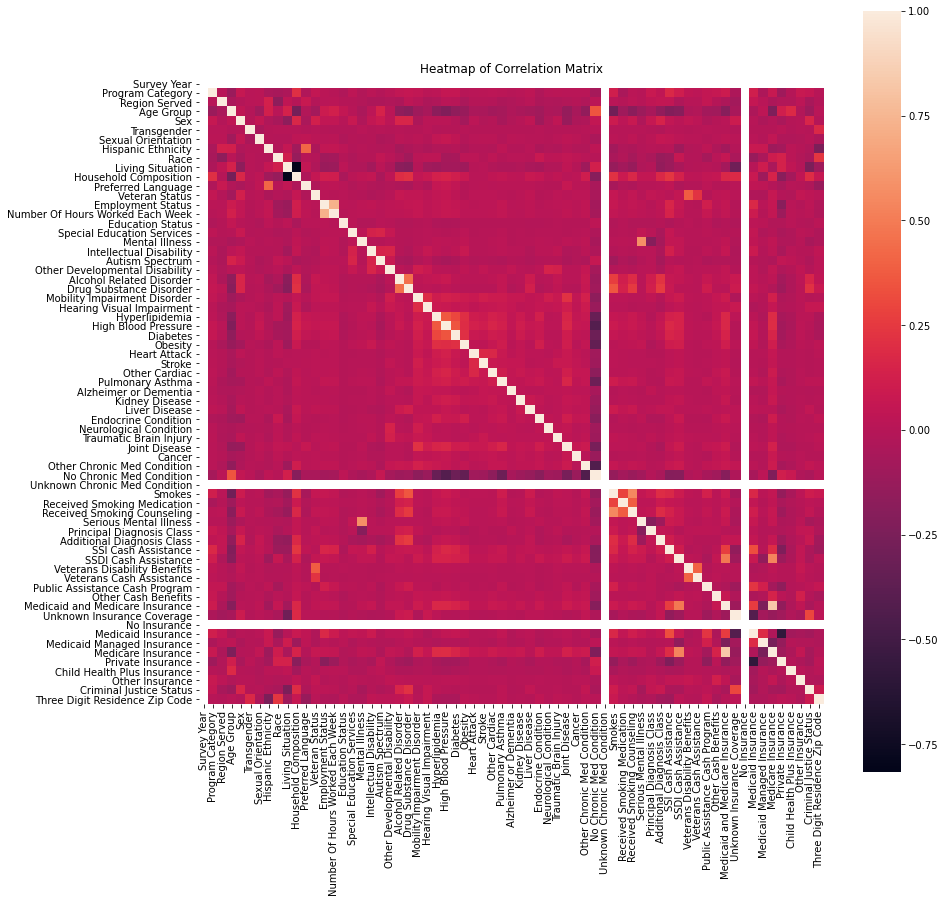

In [8]:
import seaborn as sns

corr=df.corr()
corr = (corr)
plt.figure(figsize=(14,14))
ax = sns.heatmap(corr, cbar = True,  square = True, fmt= '.2f',annot_kws=

{'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
ax.set_title('Heatmap of Correlation Matrix')

In [9]:
# Applied Features Importance for feature selection

model_feature_importance=ExtraTreesClassifier()
model_feature_importance.fit(X,Y)

print(model_feature_importance.feature_importances_)

[0.         0.02994664 0.03817062 0.0006963  0.0240069  0.0038763
 0.01281145 0.0181237  0.02897653 0.01317494 0.03029486 0.01670349
 0.00868421 0.02586833 0.01362195 0.03867528 0.00049886 0.00129837
 0.01254293 0.001705   0.00883196 0.01757929 0.0192746  0.01424724
 0.01422581 0.01922689 0.017446   0.02014706 0.02120621 0.0332593
 0.03136538 0.01831981 0.00488832 0.00981587 0.01053629 0.01295187
 0.00461758 0.00842615 0.01714487 0.01113272 0.02333104 0.00279126
 0.         0.0235251  0.01022536 0.01775636 0.00235818 0.0086641
 0.03424734 0.02340885 0.02042528 0.00212653 0.00157362 0.02035787
 0.01697563 0.0122693  0.00375853 0.         0.01138439 0.02467278
 0.01386569 0.01177551 0.00064525 0.0109623  0.01221812 0.0563617 ]


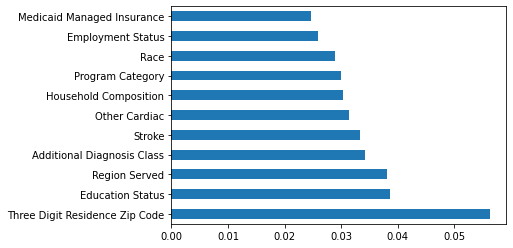

In [10]:
# For better understanding, visualize the graph

feat_importances = pd.Series(model_feature_importance.feature_importances_, index = X.columns)

feat_importances.nlargest(11).plot(kind = 'barh')
plt.show()

In [11]:
# We selected the 5 freatures sorted above
# Features are Diabetes, Pulmonary_Asthma, Hyperlipidemia, High_Blood_Pressure
# And selected label as Heart_Attack

features = df.loc[:, ['Household Composition', 'Other Cardiac', 'Program Category', 'Stroke', 'Additional Diagnosis Class', 'Education Status', 'Region Served', 'Three Digit Residence Zip Code']]
label = Y

In [12]:
print(features)

        Household Composition  Other Cardiac  Program Category  Stroke  \
2                           0              0                 2       0   
4                           1              0                 2       0   
7                           0              0                 2       0   
8                           0              0                 2       0   
10                          2              0                 2       0   
...                       ...            ...               ...     ...   
187184                      1              0                 3       0   
187186                      2              0                 2       0   
187187                      2              0                 3       0   
187190                      2              0                 3       0   
187191                      0              0                 2       0   

        Additional Diagnosis Class  Education Status  Region Served  \
2                                3      

In [13]:
print(label)

[0 0 0 ... 0 0 0]


In [14]:
# Selecting the appropriate model by checking their accuracy

models=[]
models.append(("KNN",KNeighborsClassifier()))
models.append(("Support vector Machine",SVC()))
models.append(("GaussianNB",GaussianNB()))
models.append(("Decesion",DecisionTreeClassifier()))

In [15]:
# Setting up the parameters for kFold

kv=KFold(n_splits=10, random_state=8, shuffle=True)

In [16]:
# Checking the accuracy for each listed above model

for names,model in models:
    results=cross_val_score(model,features,label,cv=kv,scoring="accuracy")
    print(names,results.mean(),"\n")

KNN 0.9862576956872535 

Support vector Machine 0.9863660212830443 

GaussianNB 0.9406202972663014 

Decesion 0.9833792316549583 



In [17]:
# Selected Gaussian Naive Bayes because its accuracy is 94% which is more feasible than others

# Spit features and label in train and test
X_train, X_test, Y_train, Y_test = train_test_split(features, label, test_size=0.5, random_state=0)

# Call GaussianNB object
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, Y_train)

# Predict the test data
Y_pred = gnb.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [18]:
# Print the Accuracy score

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')

Accuracy: 94.08214429415952 %


In [19]:
# ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
print("False Positive Rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive Rate [0.         0.05283303 1.        ]
True Positive Rate [0.         0.47586207 1.        ]
Threshold [2 1 0]


In [20]:
# Logarithmic Loss

log_loss = metrics.log_loss(Y_test, Y_pred)
print("Logarithmic Loss: ", log_loss)

Logarithmic Loss:  2.043996625990953


In [21]:
# print the Classification Report

class_report = classification_report(Y_test,Y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     31874
           1       0.11      0.48      0.18       435

    accuracy                           0.94     32309
   macro avg       0.55      0.71      0.57     32309
weighted avg       0.98      0.94      0.96     32309



In [22]:
# Print Confusin Matrix

conf_mat=confusion_matrix(Y_test,Y_pred)
print(conf_mat)

[[30190  1684]
 [  228   207]]
